# <center>Методы валидации
>Главная цель машинного обучения — усвоить общие закономерности в данных, а не просто запомнить обучающий, или тренировочный, набор данных (training data).
>
>Поэтому так важно иметь отложенный набор данных (с известными правильными ответами), который модель не видела во время обучения. На нём мы будем оценивать качество обученной модели.

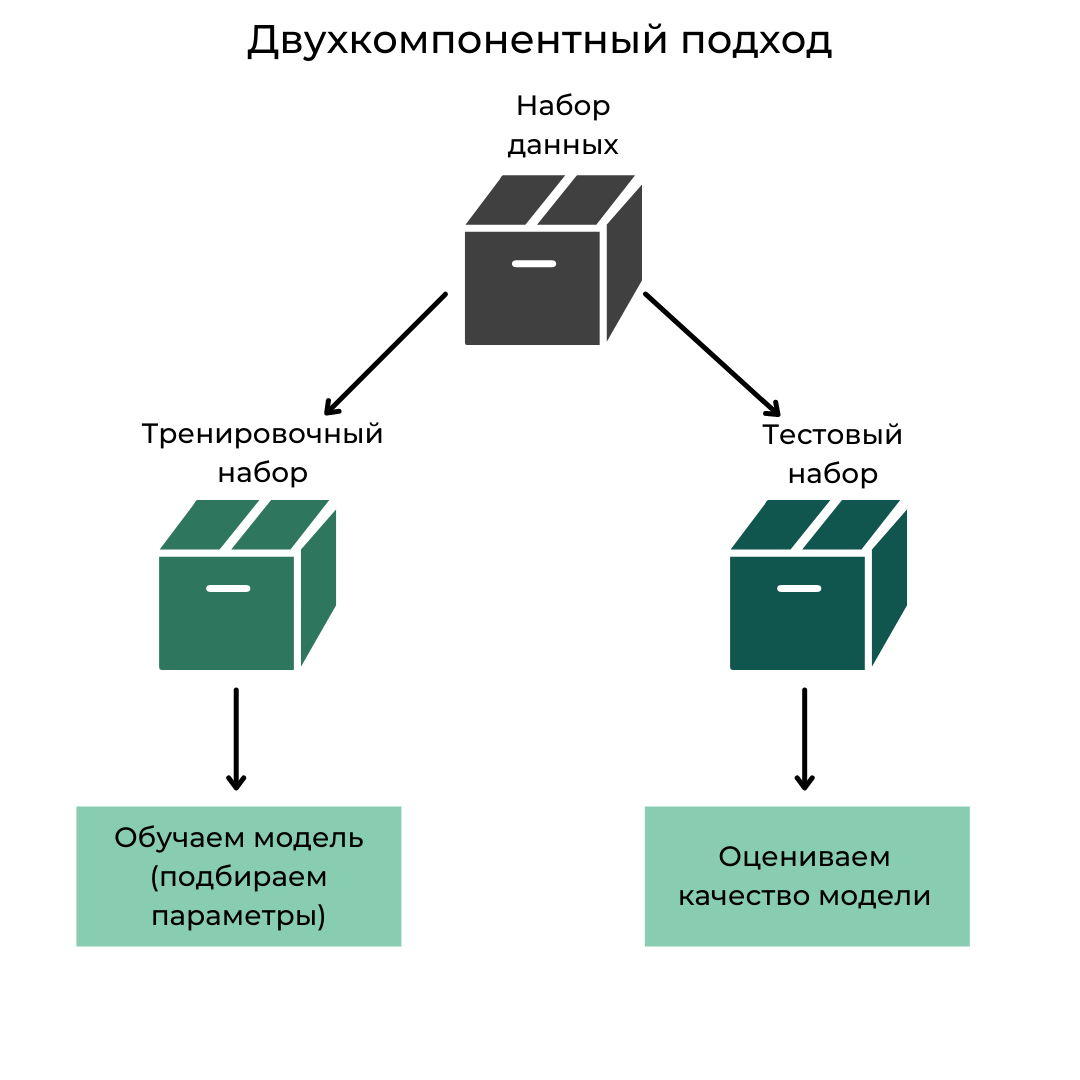

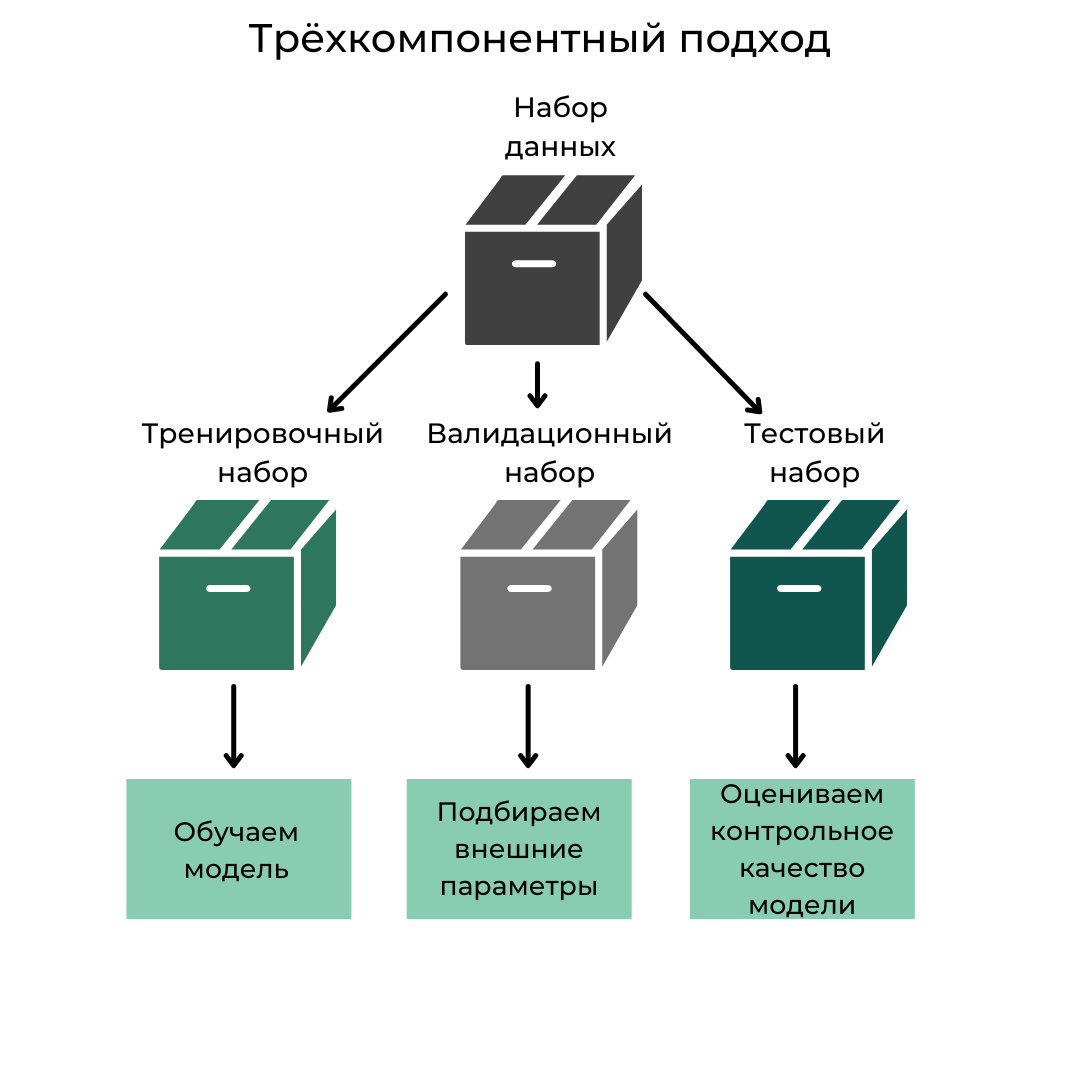

* **Обучающая (тренировочная)** — набор данных, который используется в процессе обучения модели (подбора внутренних параметров, например коэффициентов линейной регрессии или предикатов в деревьях решений).
* **Валидационная (проверочная)** — набор данных, на котором мы оцениваем промежуточные результаты обучения.

    Основная цель создания такого набора данных — отслеживание переобучения.

    На валидационной выборке мы производим подбор гиперпараметров — внешних параметров модели, например коэффициентов регуляризации, максимальной глубины дерева, количества деревьев в случайном лесу и т. д.
* **Тестовая (контрольная)** — набор данных, который имитирует работу модели в реальных условиях после подбора всех параметров.

    С помощью этого набора осуществляется окончательная проверка качества.

    Главное условие для тестовой выборки — она должна быть независимой от обучающей.

Тестирование — это попытка что-то выяснить, а валидация — доказать, что что-то является истиной (в нашем случае — доказать, что качество модели на валидационной выборке совпадает с качеством при обучении).

Вне зависимости от того, как будут называться контрольные выборки, важная концепция, которую необходимо сохранить, состоит в том, что **окончательный набор** (называемый тестом или валидацией) не используется в процессе обучения модели, а используется **исключительно для оценки её качества**.

>Процесс проверки предсказательной способности модели машинного обучения называется **валидацией**.


# <center>Hold-out

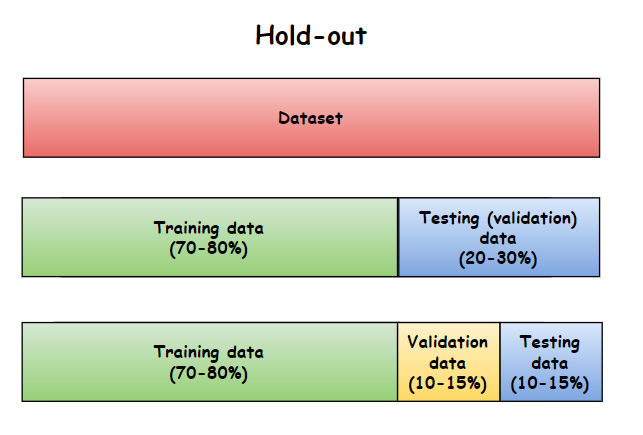

## Преимущества:
* Очень простой и понятный
* Чаще всего применяется на больших датасетах, так как требует значительно меньше вычислительных мощностей, чем другие методы.
## Недостатки:
* Важно помнить, что разбиение производится случайным образом и оценка в этом методе зависит от того, какие наблюдения попали в набор для валидации. Это плохо, так как возможна ситуация, когда распределение целевого признака в тренировочной, валидационной (и тестовой) выборках может значительно различаться и оценка качества может быть необъективной.

# <center>K-fold
>Метод **k-fold** более известен как **кросс-валидация (cross validation)**, или **перекрёстный контроль**.

Пожалуй, это самый популярный метод валидации для оценки качества моделирования, и он используется практически во всех проектах. Эта идея также применяется во многих моделях и методах машинного обучения, например в стекинге.

**Алгоритм кросс-валидации:**
1. Разбить исходную выборку на $k$ частей — **фолдов (fold)**.
2. Повторять $k$ раз:
    * Обучить модель на $k-1$ частях. Назовём их **тренировочными фолдами (training fold)**. 
    * Произвести оценку качества (вычислить метрику) на оставшейся части. Назовем её **валидационным фолдом (validation fold)**.
3. Усреднить значения метрики на валидационных фолдах.

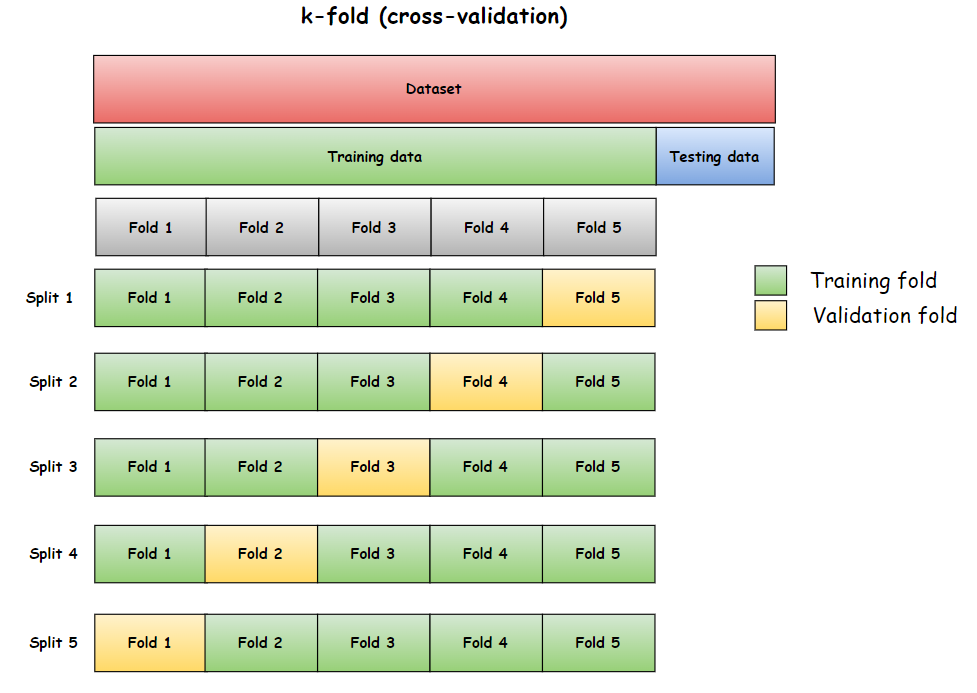

Благодаря такому подходу мы избавляемся от необходимости создавать отложенную валидационную выборку — мы генерируем её искусственно на каждом из этапов кросс-валидации из исходного набора данных. Каждая из $k$ частей исходного обучающего набора данных используется в качестве валидационной выборки.

Для больших наборов данных в качестве значения $k$ часто берут 10, то есть выборка разбивается на десять фолдов. В случае маленьких выборок $k$ берут равным 3 или 5.

>Чем больше , тем больше моделей будут обучаться, тем объективнее будет оценка качества, однако тем больше времени займёт процесс валидации.

## Преимущества
* Подход позволяет получить более устойчивую к выбросам оценку качества модели, так как модель обучается на нескольких независимых наборах данных.
* Значения метрик получаются более объективными, ведь мы обучаем одну модель  раз — у нас получается  независимых друг от друга значений метрики.
## Недостатки
* Подход предусматривает, что мы обучаем одну и ту же модель $k$ раз, что, очевидно, плохо сказывается на производительности. Если модель обучается довольно медленно (например, сложная нейронная сеть), то валидация может занять очень много времени.


# <center>Leave-one-out
>Метод **leave-one-out (отложенный пример)**, или **поэлементная кросс-валидация** — это частный случай кросс-валидации (*k-fold*), когда размер $k$ равняется размеру всей выборки $k=n$, где $n$ — количество примеров (строк в таблице).

**Алгоритм метода:**
1. Повторять $n$ раз:
    * Выбрать один случайный пример для валидации.
    * Обучить модель на всех оставшихся $n-1$ примерах.
    * Произвести оценку качества (вычислить метрику) на отложенном примере.
2. Усреднить значение метрик на всех примерах.

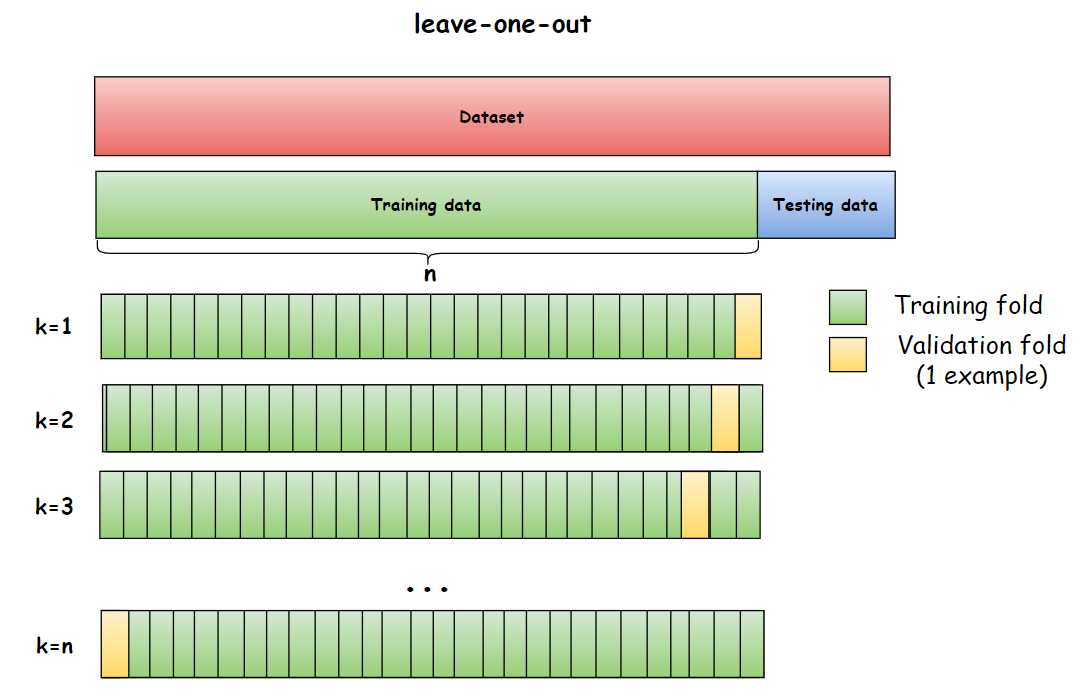

## Преимущества:
* Идеально подходит для небольших датасетов (менее 100 примеров).
* Поскольку все доступные данные используются как для обучения, так и для валидации, значения метрик наиболее объективны и надёжны.
## Недостатки:
* Подход предусматривает, что мы обучаем одну и ту же модель  раз. Очевидно, что чем больше примеров в обучающем наборе данных, тем больше моделей мы будем обучать. Поэтому метод не подходит для оценки качества модели на больших наборах данных, поскольку становится очень ресурсозатратным.

# <center>Итоги
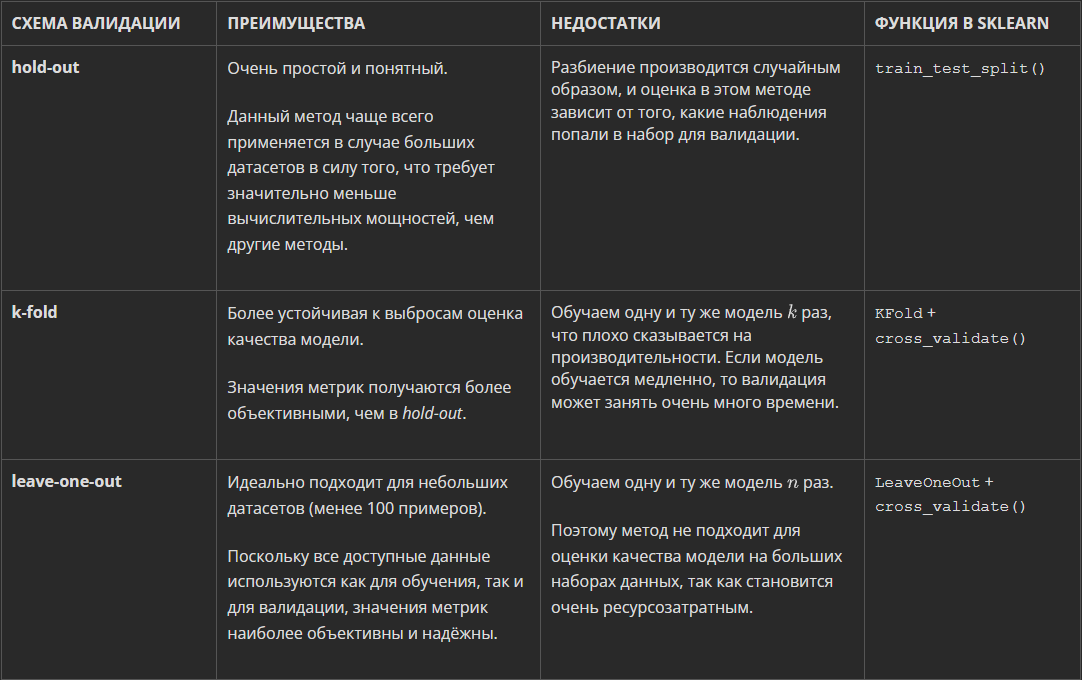